In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import logging

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

logging.basicConfig()

/home/matthew/venv/rowing/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1961: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/matthew/venv/rowing/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1877: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/matthew/venv/rowing/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/mnt/c/Users/matthew/Source/rowing/world_rowing/dashboard.py:500: RuntimeWarning: All-NaN axis encountered
  self.p_win_ax.set_ylim(0, np.nan_to_num(np.nanmax(win_probs)) + 0.05)


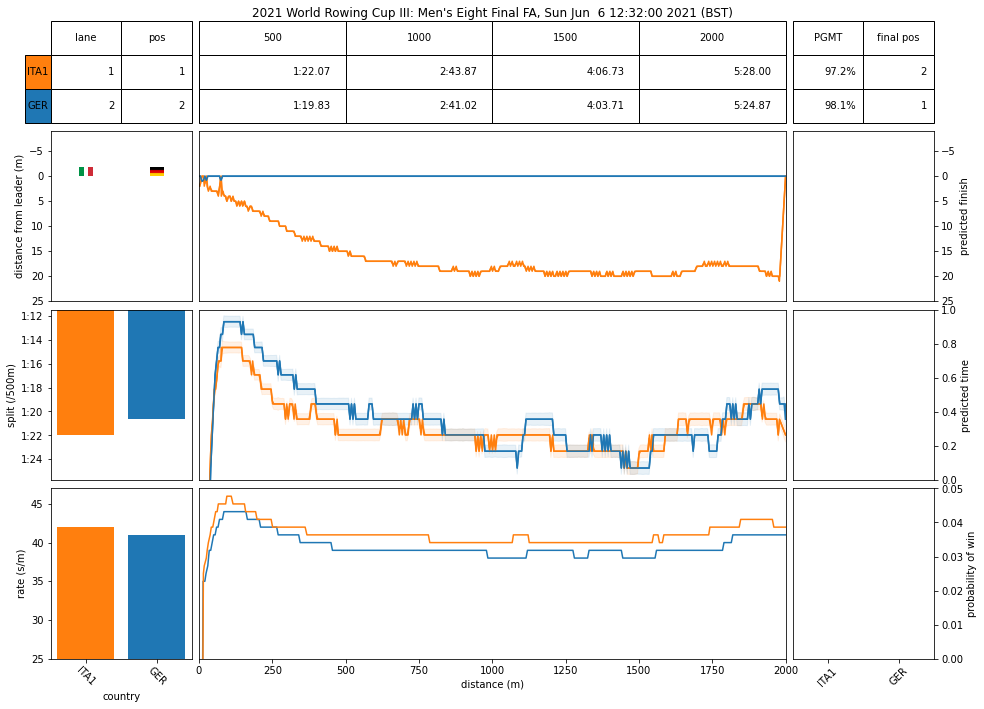

,Race,Time,Time to race


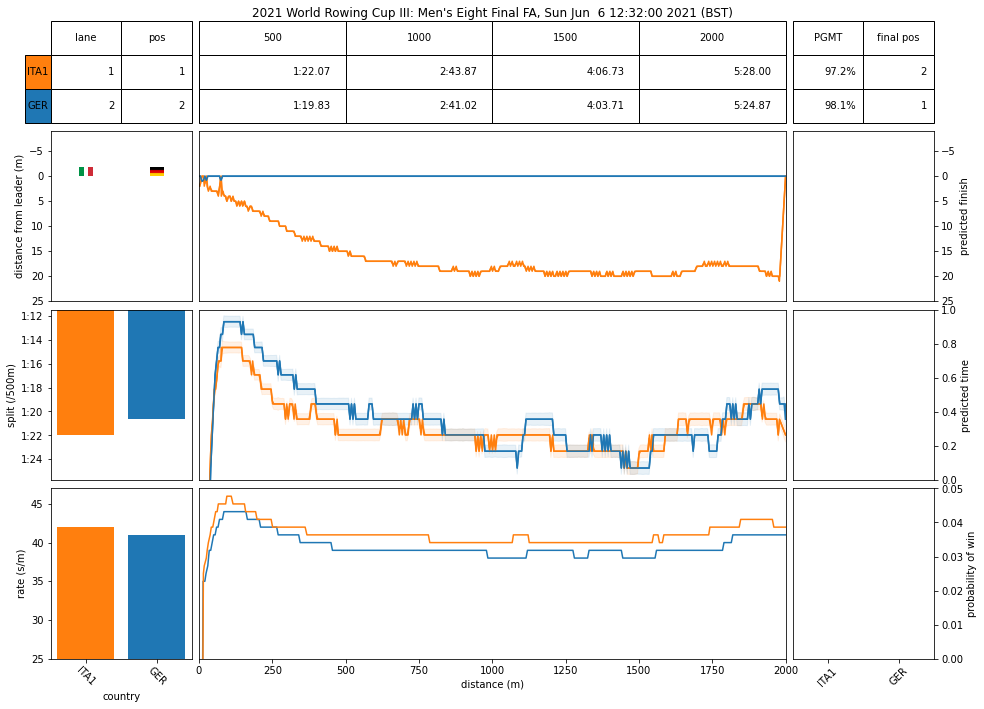

In [3]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.live_dashboard()

api.show_next_races()

400    5:27.36
Name: time, dtype: object

time                5:27.36         
Country                ITA1      GER
currentPosition           1        2
distanceTravelled      2000     2000
distanceFromLeader        0        0
strokeRate               42       41
metrePerSecond          6.1      6.2
GMT                 5:18.68  5:18.68
PGMT                  97.3%    97.3%

In [9]:
    live_data = dash.race_tracker.live_data
    
    current_data = live_data.set_index('time').iloc[-1]
    
    time_elapsed = utils.format_totalseconds(current_data.name)
    
    current_data.loc['PGMT'] = current_data.loc['PGMT'].apply("{:.1%}".format)

    current_data

currentPosition     ITA1       1.0
                    GER        2.0
distanceTravelled   ITA1    2000.0
                    GER     2000.0
distanceFromLeader  ITA1       0.0
                    GER        0.0
strokeRate          ITA1      42.0
                    GER       41.0
metrePerSecond      ITA1       6.1
                    GER        6.2
GMT                 ITA1    318.68
                    GER     318.68
PGMT                ITA1       NaN
                    GER        NaN
Name: 327.368974949712, dtype: object

In [ ]:
livetracker.get_current_data(live_data)

In [ ]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('BoatClass')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.plot(pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();